<a href="https://colab.research.google.com/github/ishita164/DataAnalytics/blob/Experiments/DA4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from scipy.stats import spearmanr

data = pd.read_csv('climate_change.csv')
data.info()
len(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      308 non-null    int64  
 1   Month     308 non-null    int64  
 2   MEI       308 non-null    float64
 3   CO2       308 non-null    float64
 4   CH4       308 non-null    float64
 5   N2O       308 non-null    float64
 6   CFC-11    308 non-null    float64
 7   CFC-12    308 non-null    float64
 8   TSI       308 non-null    float64
 9   Aerosols  308 non-null    float64
 10  Temp      308 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 26.6 KB


308

In [2]:
data.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [3]:
data.tail()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
303,2008,8,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,2008,9,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,2008,10,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,2008,11,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394
307,2008,12,-0.666,385.56,1812.88,322.182,244.204,535.005,1365.6926,0.0046,0.330


In [4]:
data.shape

(308, 11)

In [5]:
data.isnull()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
303,False,False,False,False,False,False,False,False,False,False,False
304,False,False,False,False,False,False,False,False,False,False,False
305,False,False,False,False,False,False,False,False,False,False,False
306,False,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isnull().sum()

Year        0
Month       0
MEI         0
CO2         0
CH4         0
N2O         0
CFC-11      0
CFC-12      0
TSI         0
Aerosols    0
Temp        0
dtype: int64

In [7]:
#any: if any NA values are present, drop that label
data.dropna(how = 'any').shape

(308, 11)

In [8]:
#all: if all values ate NA, drop that label
data.dropna(how = 'all').shape

(308, 11)

In [9]:
data.duplicated().sum()

0

In [10]:
data.describe()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1995.662338,6.551948,0.275555,363.226753,1749.824513,312.391834,251.973068,497.524782,1366.070759,0.016657,0.256776
std,7.423197,3.447214,0.937918,12.647125,46.051678,5.225131,20.231783,57.826899,0.399610,0.029050,0.179090
min,1983.000000,1.000000,-1.635000,340.170000,1629.890000,303.677000,191.324000,350.113000,1365.426100,0.001600,-0.282000
25%,1989.000000,4.000000,-0.398750,353.020000,1722.182500,308.111500,246.295500,472.410750,1365.717050,0.002800,0.121750
50%,1996.000000,7.000000,0.237500,361.735000,1764.040000,311.507000,258.344000,528.356000,1365.980900,0.005750,0.248000
75%,2002.000000,10.000000,0.830500,373.455000,1786.885000,316.979000,267.031000,540.524250,1366.363250,0.012600,0.407250
max,2008.000000,12.000000,3.001000,388.500000,1814.180000,322.182000,271.494000,543.813000,1367.316200,0.149400,0.739000


In [11]:
corelation = data.corr()

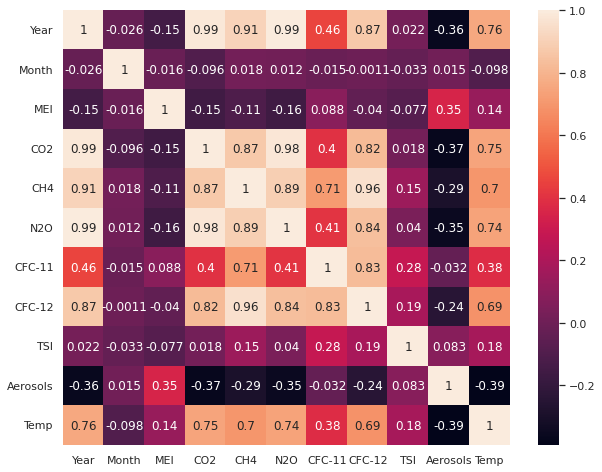

In [12]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns,annot=True)

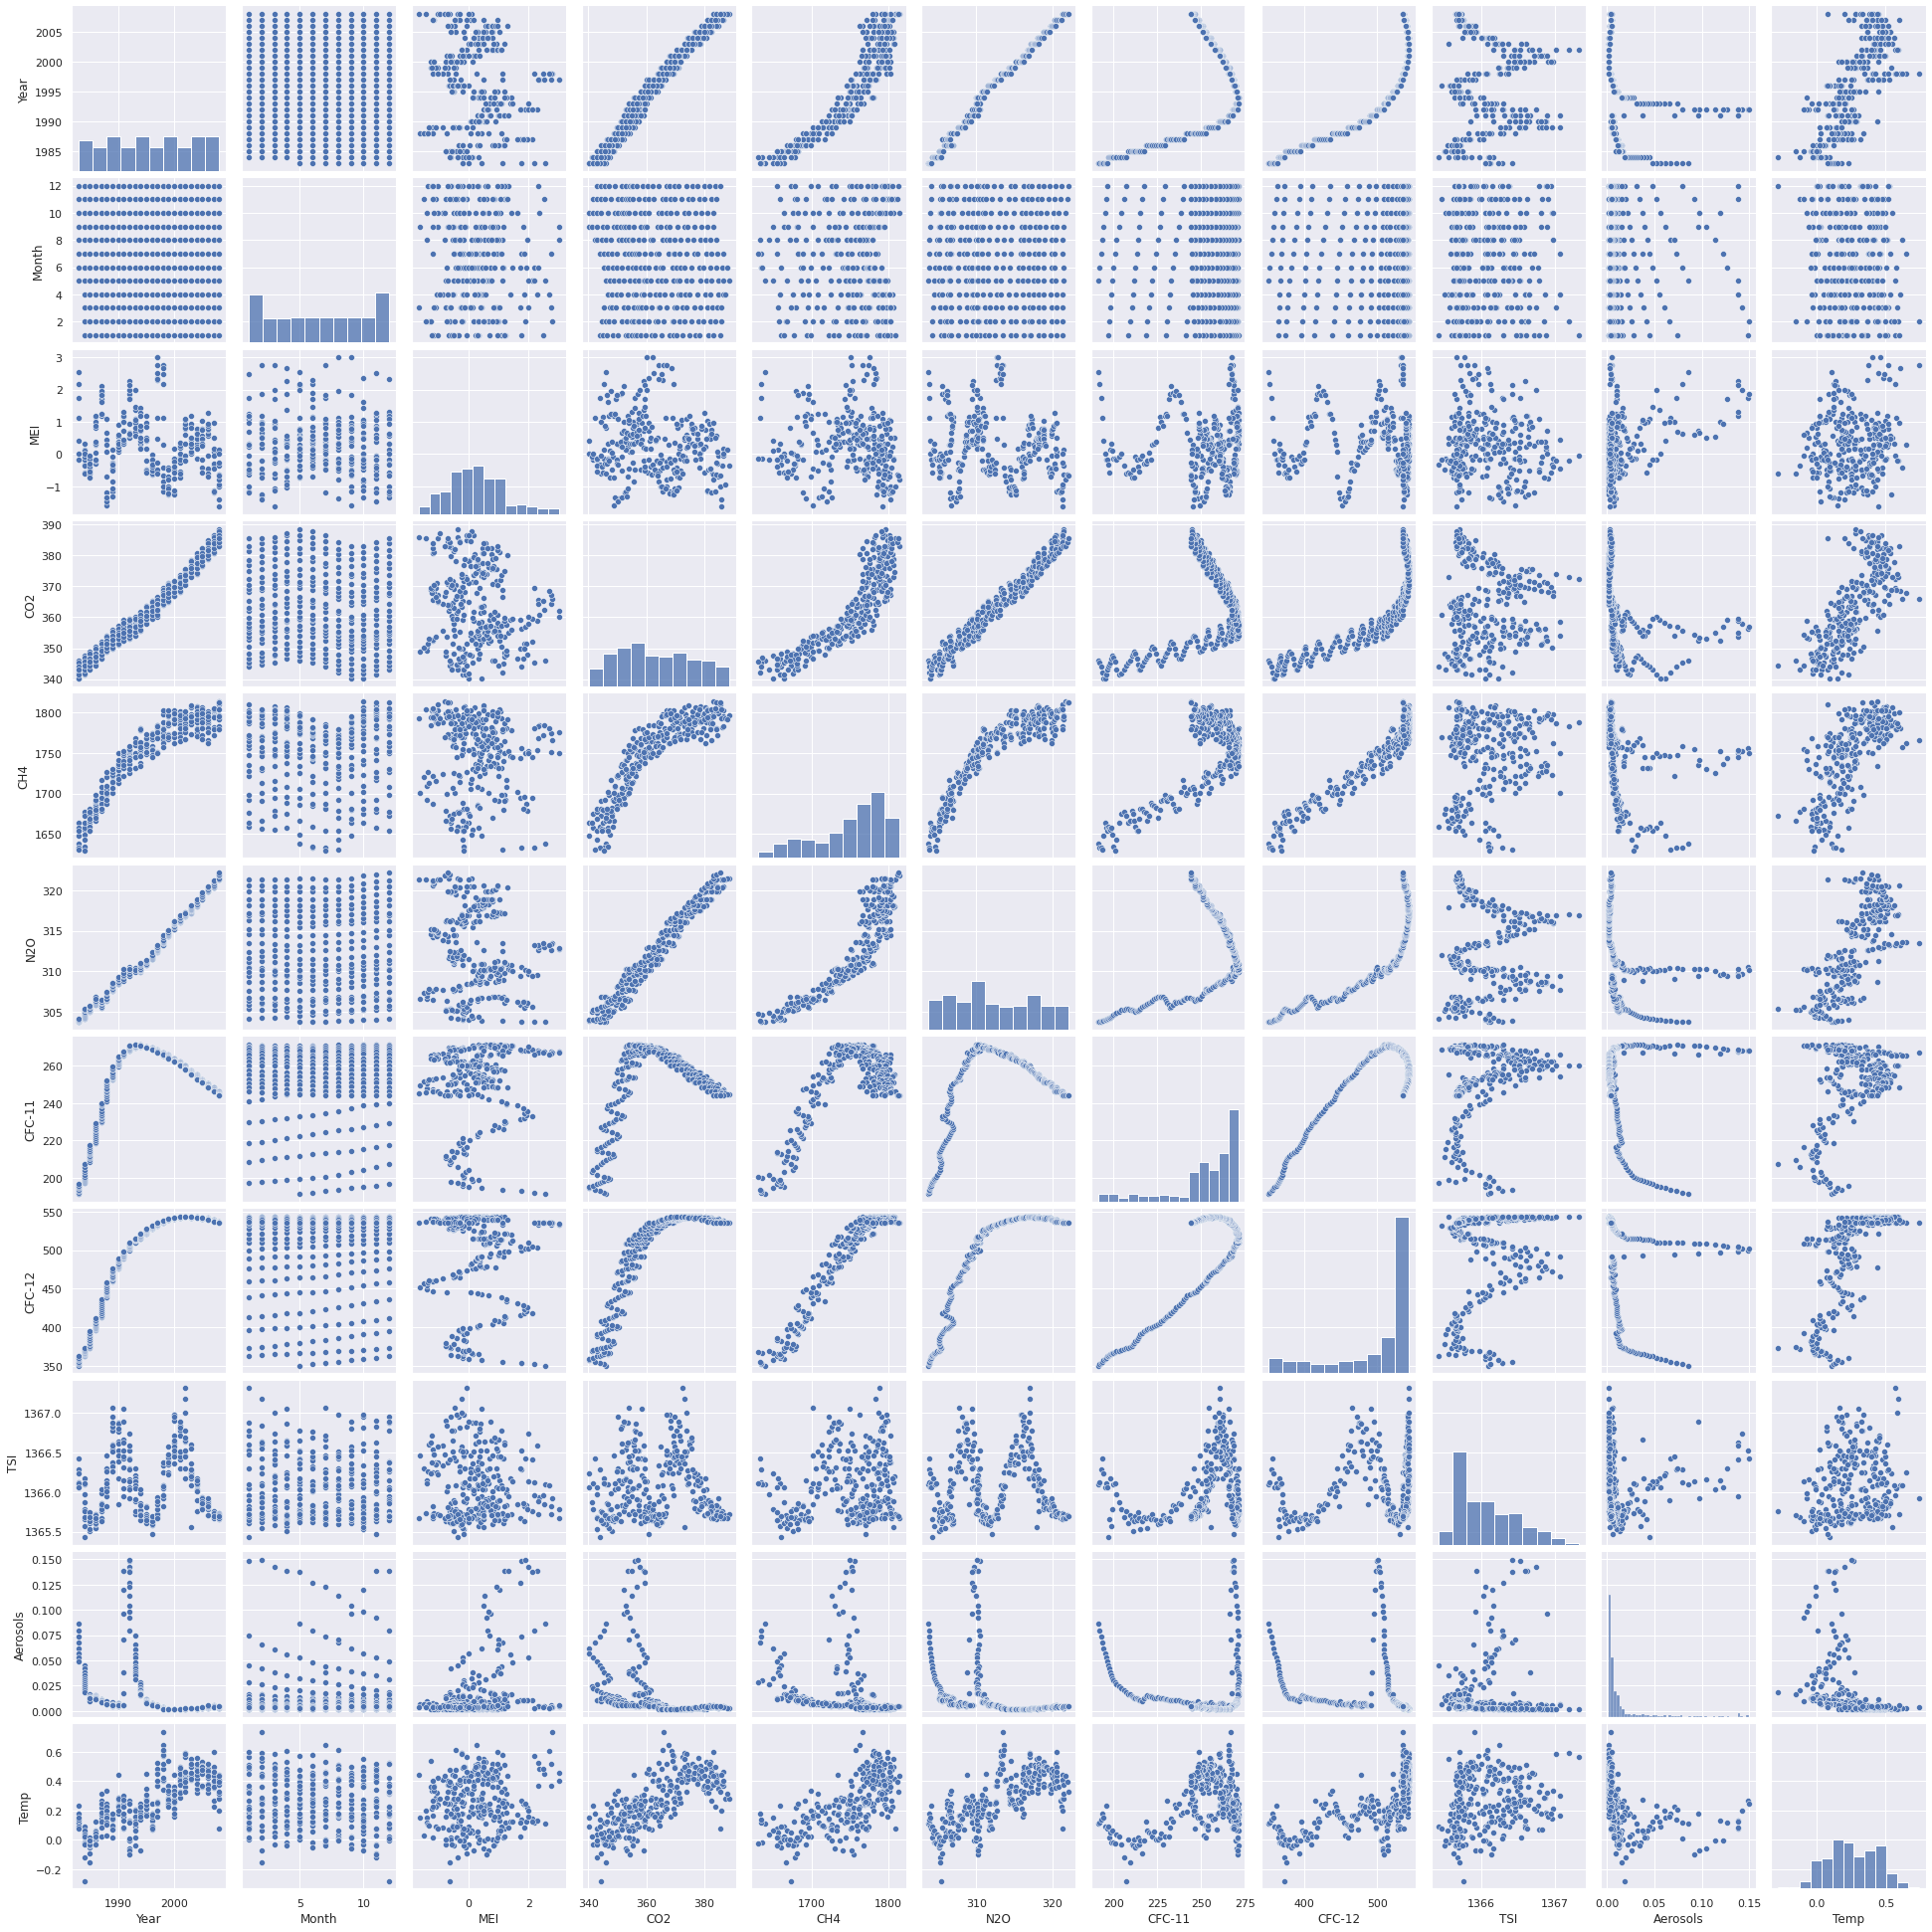

In [13]:
sns.pairplot(data)

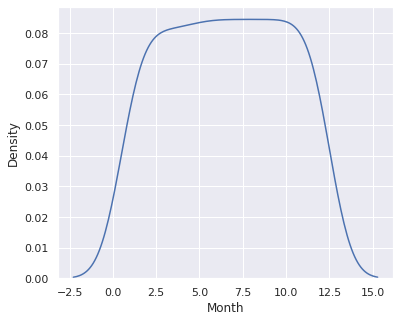

In [14]:
sns.set(rc = {'figure.figsize':(6,5)})
sns.kdeplot(data.Month)

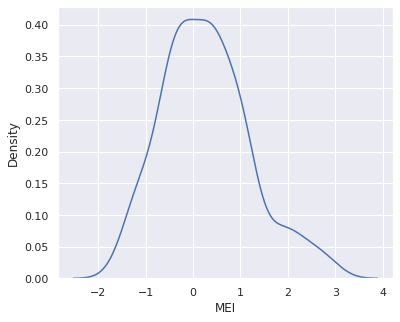

In [15]:
sns.kdeplot(data.MEI)

In [16]:
len(data)

308

In [17]:
# upto_2006
training_set = data[data["Year"] < 2007]
len(training_set)

284

In [18]:
training_set.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [19]:
# after_2006
testing_set = data[data["Year"] > 2006]
len(testing_set)

24

In [20]:
# https://towardsdatascience.com/a-simple-guide-to-linear-regression-using-python-7050e8c751c1

In [21]:
!pip install statsmodels


In [22]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [38]:
y = data['Temp'] # dependent variable
x = data['MEI'] # independent variable
x = sm.add_constant(x) # adding a constant
lm = sm.OLS(y,x).fit() # fitting the model
lm.predict(x)
lm.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     5.705
Date:                Mon, 28 Mar 2022   Prob (F-statistic):             0.0175
Time:                        15:48:40   Log-Likelihood:                 96.032
No. Observations:                 308   AIC:                            -188.1
Df Residuals:                     306   BIC:                            -180.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2497      0.011     23.649      0.000       0.229       0.270
MEI            0.0258      0.011      2.389      0.018       0.005       0.047
==============================================================================
Omnibus:                       18.770   Durbin-Watson:                   0.228
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.524
Skew:                          -0.058   Prob(JB):                       0.0232
Kurtosis:                       2.243   Cond. No.                         1.34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
y_pred = 0.0258 * data['MEI'] + 0.2497

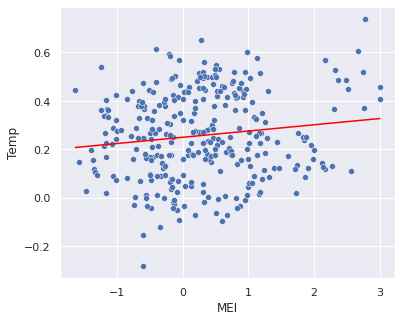

In [40]:
# plotting the data points
sns.scatterplot(x=data['MEI'], y=y)
#plotting the line
sns.lineplot(x=data['MEI'],y=y_pred, color='red')

In [24]:
y = data['Temp'] # dependent variable
x = data['CO2'] # independent variable
x = sm.add_constant(x) # adding a constant
lm = sm.OLS(y,x).fit() # fitting the model
lm.predict(x)
lm.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     389.9
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           1.56e-56
Time:                        15:41:32   Log-Likelihood:                 219.71
No. Observations:                 308   AIC:                            -435.4
Df Residuals:                     306   BIC:                            -428.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5931      0.195    -18.417      0.000      -3.977      -3.209
CO2            0.0106      0.001     19.745      0.000       0.010       0.012
==============================================================================
Omnibus:                        8.929   Durbin-Watson:                   0.517
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               13.229
Skew:                           0.186   Prob(JB):                      0.00134
Kurtosis:                       3.945   Cond. No.                     1.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
y_pred = 0.0106 * data['CO2'] - 3.5931

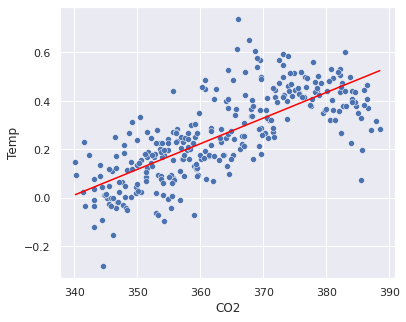

In [43]:
# plotting the data points
sns.scatterplot(x=data['CO2'], y=y)
#plotting the line
sns.lineplot(x=data['CO2'],y=y_pred, color='red')

In [56]:
coef, p = spearmanr(data['Temp'], data['CO2'])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.777
Samples are correlated (reject H0) p=0.000


In [25]:
y = data['Temp'] # dependent variable
x = data['CH4'] # independent variable
x = sm.add_constant(x) # adding a constant
lm = sm.OLS(y,x).fit() # fitting the model
lm.predict(x)
lm.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     293.5
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           1.34e-46
Time:                        15:41:32   Log-Likelihood:                 196.75
No. Observations:                 308   AIC:                            -389.5
Df Residuals:                     306   BIC:                            -382.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5046      0.278    -16.202      0.000      -5.052      -3.957
CH4            0.0027      0.000     17.132      0.000       0.002       0.003
==============================================================================
Omnibus:                        1.644   Durbin-Watson:                   0.510
Prob(Omnibus):                  0.440   Jarque-Bera (JB):                1.441
Skew:                          -0.049   Prob(JB):                        0.487
Kurtosis:                       3.321   Cond. No.                     6.66e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
y_pred = 0.0027 * data['CH4'] - 4.5046

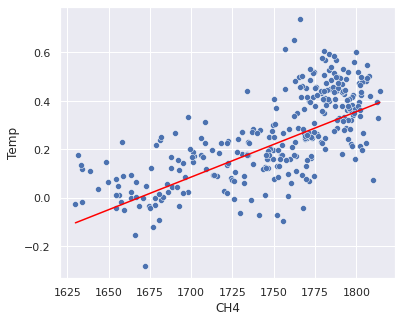

In [46]:
# plotting the data points
sns.scatterplot(x=data['CH4'], y=y)
#plotting the line
sns.lineplot(x=data['CH4'],y=y_pred, color='red')

In [57]:
coef, p = spearmanr(data['Temp'], data['CH4'])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.724
Samples are correlated (reject H0) p=0.000


In [26]:
y = data['Temp'] # dependent variable
x = data['N2O'] # independent variable
x = sm.add_constant(x) # adding a constant
lm = sm.OLS(y,x).fit() # fitting the model
lm.predict(x)
lm.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     377.7
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           2.35e-55
Time:                        15:41:32   Log-Likelihood:                 216.98
No. Observations:                 308   AIC:                            -430.0
Df Residuals:                     306   BIC:                            -422.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.7012      0.410    -18.804      0.000      -8.507      -6.895
N2O            0.0255      0.001     19.433      0.000       0.023       0.028
==============================================================================
Omnibus:                        9.530   Durbin-Watson:                   0.500
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               16.359
Skew:                           0.127   Prob(JB):                     0.000280
Kurtosis:                       4.100   Cond. No.                     1.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
y_pred = 0.0255 * data['N2O'] - 7.7012

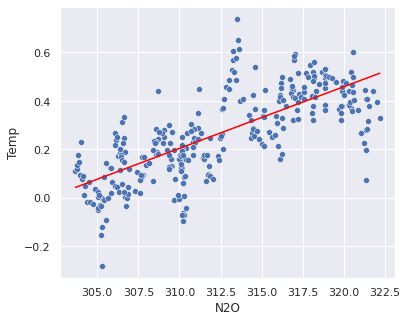

In [48]:
# plotting the data points
sns.scatterplot(x=data['N2O'], y=y)
#plotting the line
sns.lineplot(x=data['N2O'],y=y_pred, color='red')

In [59]:
coef, p = spearmanr(data['Temp'], data['N2O'])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.764
Samples are correlated (reject H0) p=0.000


In [29]:
y = data['Temp'] # dependent variable
x = data['CFC-11'] # independent variable
x = sm.add_constant(x) # adding a constant
lm = sm.OLS(y,x).fit() # fitting the model
lm.predict(x)
lm.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     51.68
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           5.03e-12
Time:                        15:43:04   Log-Likelihood:                 117.22
No. Observations:                 308   AIC:                            -230.4
Df Residuals:                     306   BIC:                            -223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5910      0.118     -4.996      0.000      -0.824      -0.358
CFC-11         0.0034      0.000      7.189      0.000       0.002       0.004
==============================================================================
Omnibus:                       12.593   Durbin-Watson:                   0.261
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                5.891
Skew:                           0.038   Prob(JB):                       0.0526
Kurtosis:                       2.327   Cond. No.                     3.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
y_pred = 0.0034 * data['CFC-11'] - 0.5910

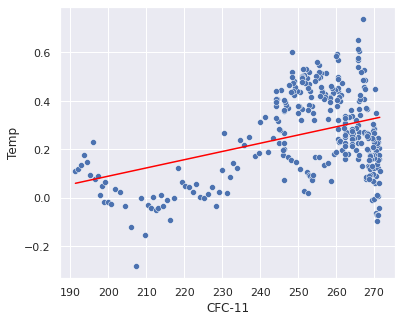

In [50]:
# plotting the data points
sns.scatterplot(x=data['CFC-11'], y=y)
#plotting the line
sns.lineplot(x=data['CFC-11'],y=y_pred, color='red')

In [60]:
coef, p = spearmanr(data['Temp'], data['CFC-11'])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.102
Samples are uncorrelated (fail to reject H0) p=0.073


In [30]:
y = data['Temp'] # dependent variable
x = data['CFC-12'] # independent variable
x = sm.add_constant(x) # adding a constant
lm = sm.OLS(y,x).fit() # fitting the model
lm.predict(x)
lm.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     276.5
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           1.12e-44
Time:                        15:43:19   Log-Likelihood:                 192.31
No. Observations:                 308   AIC:                            -380.6
Df Residuals:                     306   BIC:                            -373.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8048      0.064    -12.521      0.000      -0.931      -0.678
CFC-12         0.0021      0.000     16.627      0.000       0.002       0.002
==============================================================================
Omnibus:                        2.720   Durbin-Watson:                   0.425
Prob(Omnibus):                  0.257   Jarque-Bera (JB):                2.451
Skew:                          -0.208   Prob(JB):                        0.294
Kurtosis:                       3.133   Cond. No.                     4.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
y_pred = 0.0021 * data['CFC-12'] - 0.8048

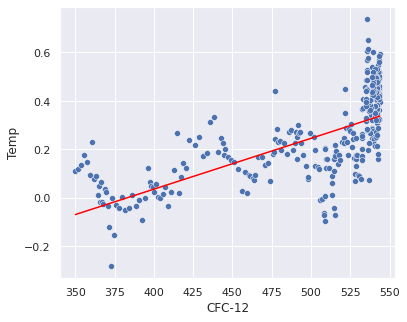

In [52]:
# plotting the data points
sns.scatterplot(x=data['CFC-12'], y=y)
#plotting the line
sns.lineplot(x=data['CFC-12'],y=y_pred, color='red')

In [61]:
coef, p = spearmanr(data['Temp'], data['CFC-12'])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.783
Samples are correlated (reject H0) p=0.000


In [31]:
y = data['Temp'] # dependent variable
x = data['TSI'] # independent variable
x = sm.add_constant(x) # adding a constant
lm = sm.OLS(y,x).fit() # fitting the model
lm.predict(x)
lm.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     10.51
Date:                Mon, 28 Mar 2022   Prob (F-statistic):            0.00132
Time:                        15:43:30   Log-Likelihood:                 98.385
No. Observations:                 308   AIC:                            -192.8
Df Residuals:                     306   BIC:                            -185.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -111.2811     34.413     -3.234      0.001    -178.996     -43.566
TSI            0.0816      0.025      3.241      0.001       0.032       0.131
==============================================================================
Omnibus:                       14.423   Durbin-Watson:                   0.243
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                6.551
Skew:                           0.075   Prob(JB):                       0.0378
Kurtosis:                       2.302   Cond. No.                     4.68e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
y_pred =0.0816 * data['TSI'] - 111.2811

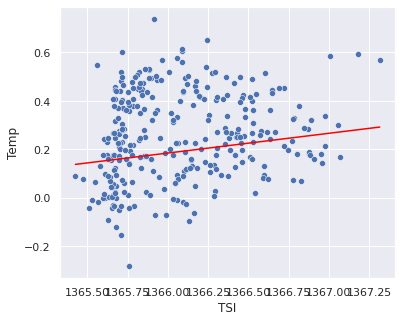

In [63]:
# plotting the data points
sns.scatterplot(x=data['TSI'], y=y)
#plotting the line
sns.lineplot(x=data['TSI'],y=y_pred, color='red')

In [64]:
coef, p = spearmanr(data['Temp'], data['TSI'])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.225
Samples are correlated (reject H0) p=0.000


In [32]:
y = data['Temp'] # dependent variable
x = data['Aerosols'] # independent variable
x = sm.add_constant(x) # adding a constant
lm = sm.OLS(y,x).fit() # fitting the model
lm.predict(x)
lm.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     55.58
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           9.28e-13
Time:                        15:43:45   Log-Likelihood:                 118.89
No. Observations:                 308   AIC:                            -233.8
Df Residuals:                     306   BIC:                            -226.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2970      0.011     27.393      0.000       0.276       0.318
Aerosols      -2.4171      0.324     -7.455      0.000      -3.055      -1.779
==============================================================================
Omnibus:                        3.898   Durbin-Watson:                   0.265
Prob(Omnibus):                  0.142   Jarque-Bera (JB):                3.113
Skew:                          -0.131   Prob(JB):                        0.211
Kurtosis:                       2.584   Cond. No.                         34.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
y_pred = -2.4171 * data['Aerosols'] + 0.2970

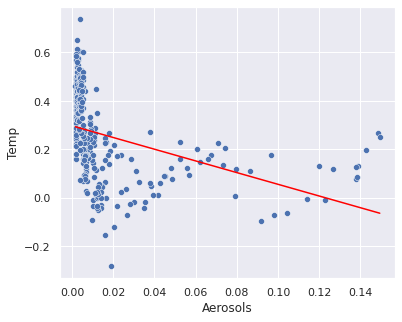

In [66]:
# plotting the data points
sns.scatterplot(x=data['Aerosols'], y=y)
#plotting the line
sns.lineplot(x=data['Aerosols'],y=y_pred, color='red')

In [67]:
coef, p = spearmanr(data['Temp'], data['Aerosols'])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: -0.725
Samples are correlated (reject H0) p=0.000


Q. Which variables are significant in the model? We will consider a variable signficant only if the p-value is below 0.05. (Select all that apply.)

a) MEI b) CO2 c) CH4 d) N2O e) CFC.11 f) CFC.12 g) TSI h) Aerosols



ANS:

All variables are significant in the model except CFC.11

Q. Which of the following is the simplest correct explanation for this contradiction?

Exercise 3

I. Climate scientists are wrong that N2O and CFC-11 are greenhouse gases - this regression analysis constitutes part of a disproof.

II. There is not enough data, so the regression coefficients being estimated are not accurate.

III. All of the gas concentration variables reflect human development - N2O and CFC.11 are correlated with other variables in the data set.



ANS:

